<a href="https://colab.research.google.com/github/codepilled/Microplastics_SOP/blob/main/KKJ_Sop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

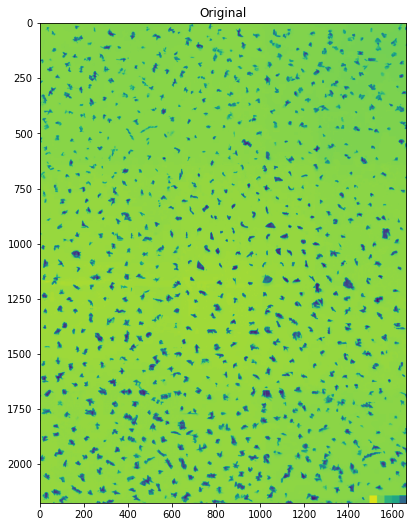

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


image = cv2.imread('/1.png',0)
plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)

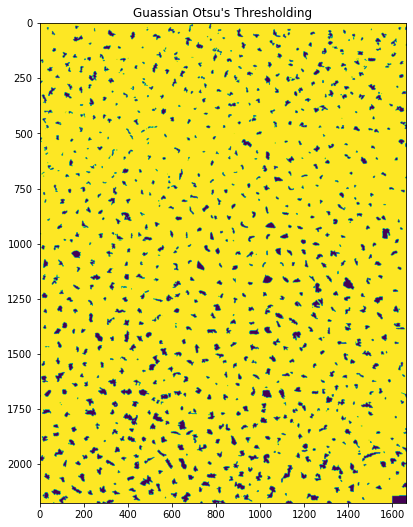

In [ ]:
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Guassian Otsu's Thresholding")
plt.imshow(th3)
plt.show()

Count of Contours  = 1125


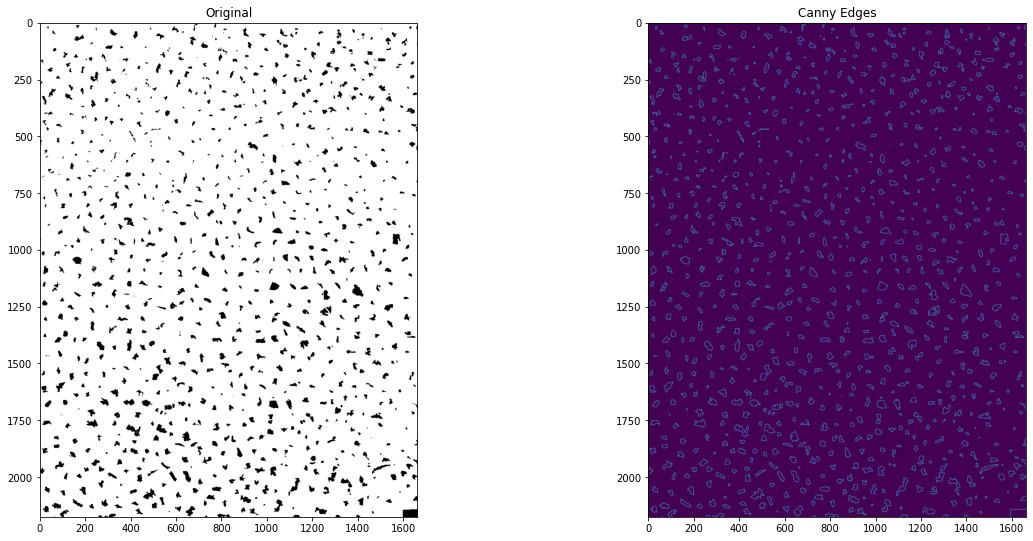

In [ ]:
image1 = th3
image1 = cv2.cvtColor(th3, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image1)
# Grayscale
gray = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
# Canny edges
edged = cv2.Canny(gray, 30, 200)
plt.subplot(2, 2, 2)
plt.title("Canny Edges")
plt.imshow(edged)
# Finding Contours
contour, hier = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Count of Contours  = " + str(len(contour)))


Count of Detected Particles  = 427


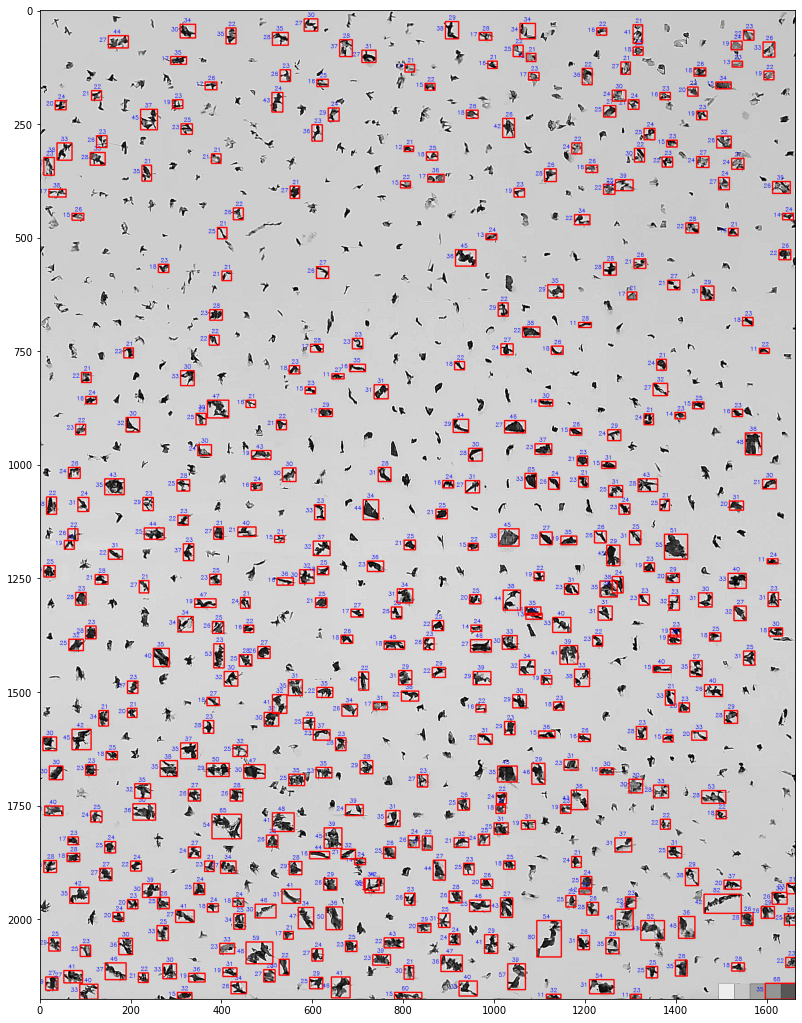

In [ ]:
from operator import countOf
# img=th3
img = cv2.imread('/1.png')
# sharpens the image
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel_sharpening)
plt.figure(figsize=(40, 40))
plt.subplot(2, 2, 1)
ctr=0
dimensionlist=[]
for cnt in contour:
  # compute the bounding rectangle of the contour
  x,y,w,h = cv2.boundingRect(cnt)
  #print(w,h)
  
  # draw the bounding rectangle
  if (w>20 and h>10):
    ctr=ctr+1
    temp=[]
    temp.append(ctr)
    temp.append(h)
    temp.append(w)
    dimensionlist.append(temp)
    height=str(h)
    width=str(w)
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.putText(img,height, (x-20, y+int(h/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,255), 1)
    cv2.putText(img,width, (x+int(w/4), y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,255), 1)

print("Count of Detected Particles  = " +str(ctr))
# display the image with bounding rectangle drawn on it
plt.imshow(img)

In [ ]:
from prettytable import PrettyTable

l = dimensionlist

table = PrettyTable(['S.No','Height', 'Width'])

for rec in l:
    table.add_row(rec)
    
print(table)

+------+--------+-------+
| S.No | Height | Width |
+------+--------+-------+
|  1   |   11   |   23  |
|  2   |   11   |   32  |
|  3   |   15   |   60  |
|  4   |   15   |   32  |
|  5   |   33   |   40  |
|  6   |   35   |   68  |
|  7   |   26   |   34  |
|  8   |   33   |   40  |
|  9   |   31   |   54  |
|  10  |   25   |   29  |
|  11  |   46   |   41  |
|  12  |   29   |   27  |
|  13  |   19   |   36  |
|  14  |   21   |   22  |
|  15  |   27   |   41  |
|  16  |   27   |   25  |
|  17  |   19   |   31  |
|  18  |   25   |   25  |
|  19  |   30   |   21  |
|  20  |   57   |   39  |
|  21  |   33   |   30  |
|  22  |   18   |   28  |
|  23  |   37   |   46  |
|  24  |   35   |   26  |
|  25  |   35   |   22  |
|  26  |   22   |   23  |
|  27  |   36   |   47  |
|  28  |   23   |   39  |
|  29  |   27   |   24  |
|  30  |   25   |   23  |
|  31  |   23   |   33  |
|  32  |   48   |   59  |
|  33  |   23   |   25  |
|  34  |   36   |   30  |
|  35  |   35   |   29  |
|  36  |   2

In [ ]:
import pandas as pd
df = pd.DataFrame(dimensionlist)
df.columns=["S.No","Height","Width"]

In [ ]:
df[["Height","Width"]].describe()

,Height,Width
count,427.000000,427.00000
mean,25.946136,29.35363
std,8.777072,8.33844
min,11.000000,21.00000
25%,19.000000,23.00000
50%,25.000000,27.00000
75%,30.000000,33.00000
max,80.000000,82.00000
